<a href="https://colab.research.google.com/github/kartheek1303/House_Price_Prediction/blob/main/house_price_prediction_using_randomforest%2CMLR%2CDecision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
from sklearn import ensemble
from sklearn import linear_model

In [18]:
dataset = pd.read_csv("/content/drive/MyDrive/hackathon 26-11/innercity.csv")

In [19]:
dataset.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.196687,1.718687e+04
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.397503,4.158908e+04
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1.423000e+03
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,7.035000e+03
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,9.575000e+03
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.300000e+04
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.652659e+06


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [21]:
dataset = dataset.drop(['cid','dayhours'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 360x216 with 0 Axes>

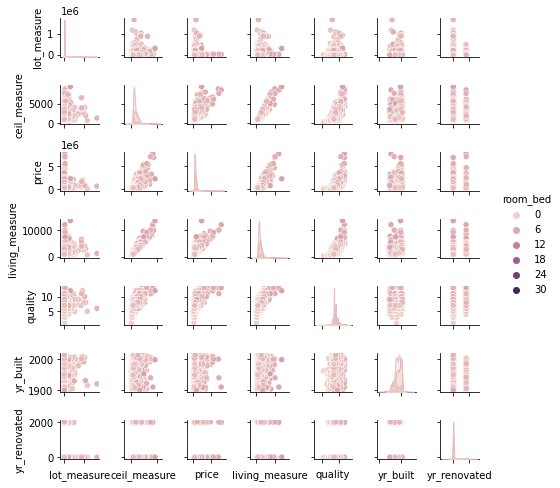

In [22]:
plt.figure(figsize=(5,3))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(dataset[['lot_measure','ceil_measure','price','living_measure','room_bed','quality','yr_built','yr_renovated']],hue='room_bed',size=1)
g.set(xticklabels=[])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


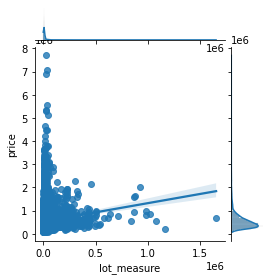

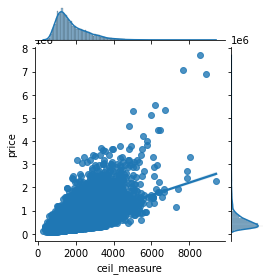

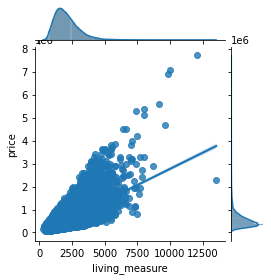

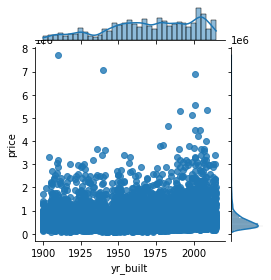

In [23]:
sns.jointplot(x='lot_measure',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='ceil_measure',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='living_measure',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='yr_built',y='price',data=dataset,kind='reg',size=4)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


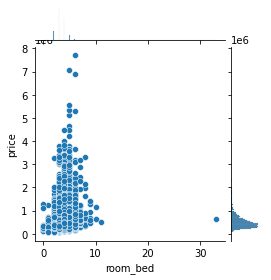

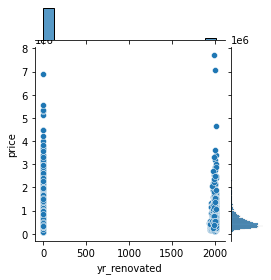

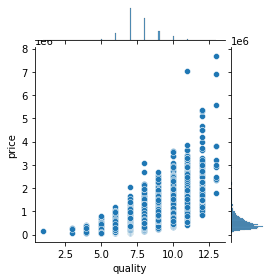

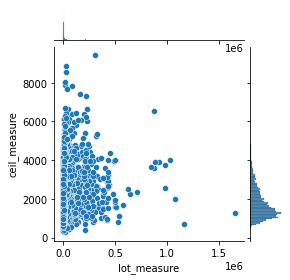

In [24]:
sns.jointplot(x='room_bed',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='yr_renovated',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='quality',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='lot_measure',y='ceil_measure',data=dataset,kind='scatter',size=4)

Text(0, 0.5, 'total')

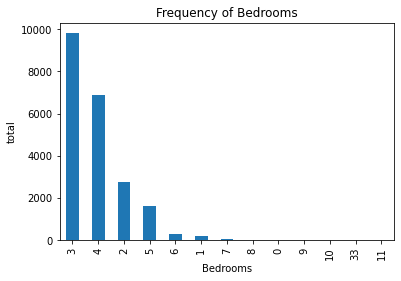

In [25]:
dataset['room_bed'].value_counts().plot(kind='bar')
plt.title('Frequency of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('total')

Text(0.5, 1.0, 'Price vs location ')

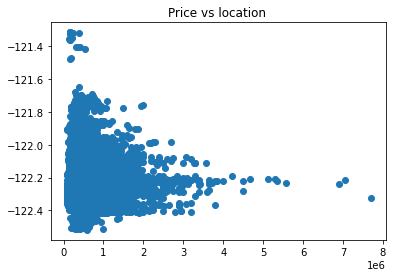

In [26]:
plt.scatter(dataset.price,dataset.long)
plt.title("Price vs location ")

Text(0.5, 1.0, 'Price vs furnished')

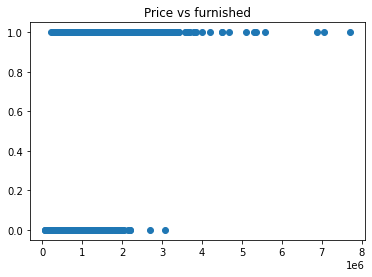

In [27]:
plt.scatter(dataset.price,dataset.furnished)
plt.title("Price vs furnished")

Text(0.5, 1.0, 'Which is the expensive location by zipcode?')

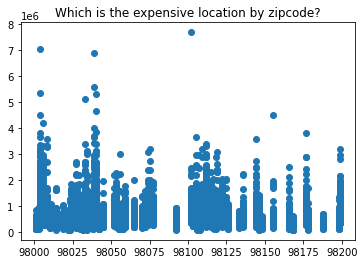

In [28]:
plt.scatter(dataset.zipcode,dataset.price)
plt.title("Which is the expensive location by zipcode?")

Text(0.5, 1.0, 'How does price vary with quality?')

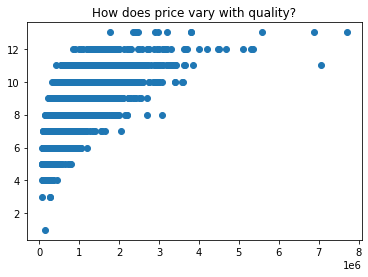

In [29]:
plt.scatter(dataset.price,dataset.quality)
plt.title("How does price vary with quality?")

Text(0.5, 1.0, 'does year built affect condition?')

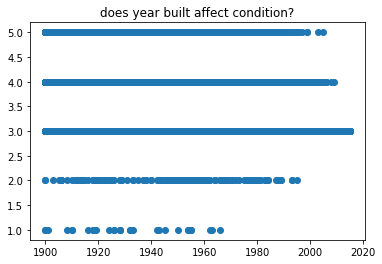

In [30]:
plt.scatter(dataset.yr_built,dataset.condition)
plt.title("does year built affect condition?")

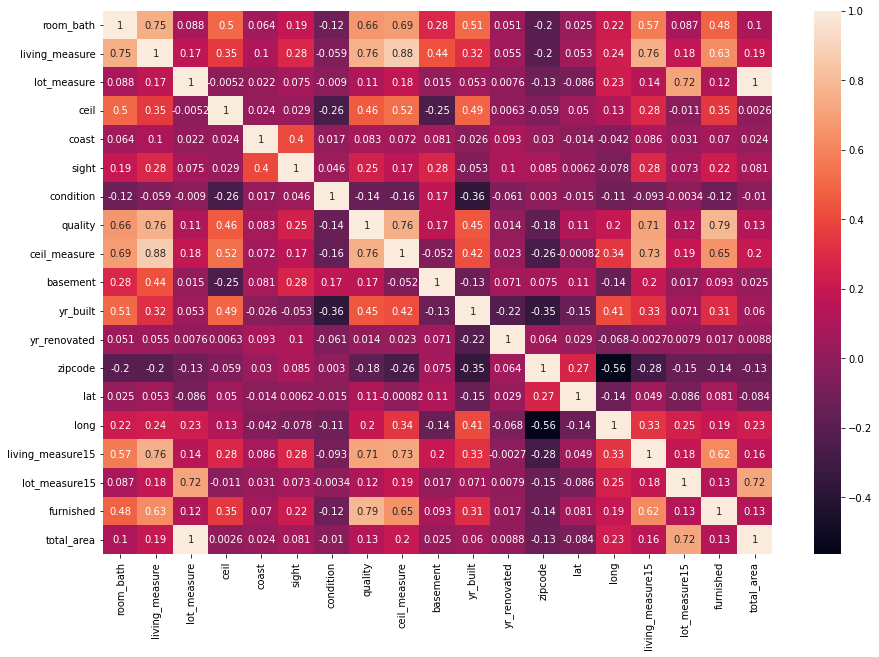

In [31]:
plt.figure(figsize=(15,10))
columns =['room_bath','living_measure','lot_measure','ceil','coast','sight','condition','quality','ceil_measure','basement','yr_built','yr_renovated','zipcode','lat','long','living_measure15','lot_measure15','furnished','total_area']
sns.heatmap(dataset[columns].corr(),annot=True)

In [32]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [34]:
regr = linear_model.LinearRegression()
a = dataset[["room_bed","room_bath","living_measure","lot_measure","ceil","coast","sight","condition","quality","ceil_measure","basement","yr_built","yr_renovated","zipcode","lat","long","living_measure15","lot_measure15","furnished","total_area"]]
b = dataset[["price"]]
sx = scale.fit_transform(a)
a_train , a_test , b_train , b_test = train_test_split(sx, b , test_size = 0.10,random_state =2)
regr.fit(a_train,b_train)
regr.score(a_test,b_test)

0.7137651604703148

In [35]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)
tr_regressor.score(X_test,y_test)

0.7054947359487669

In [36]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)
rf_regressor.score(X_test,y_test)

0.8481266628220434

In [37]:
bstregr = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 2,learning_rate = 0.1, loss = 'squared_error')
bstregr.fit(a_train,b_train)
bstregr.score(a_test,b_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8931907038960175

In [38]:
print("Decision tree  Regression Model Score is: ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is: ",round(rf_regressor.score(X_test,y_test)*100))
print("Multiple Linear Regression Model Score is: ",round(bstregr.score(a_test,b_test)*100))


Decision tree  Regression Model Score is:  71
Random Forest Regression Model Score is:  85
Multiple Linear Regression Model Score is:  89
